# Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

## Таблица с договорами

In [3]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [6]:
contract.duplicated().sum()

0

Первая таблица сожержит информацию о договорах. В таблице нет пропусков и дубликатов. Необходимо поменять некоторые типы данных: столбцы BeginDate и EndDate привести к формату даты и TotalCharges к типу данных float64.

Описание полей данных:
- customerID – уникальный идентификатор пользователя,
- BeginDate – дата начала пользования услугами,
- EndDate – дата окончания пользования услугами,
- Type – тип оплаты: ежемесячный, годовой и тд,
- PaperlessBilling – безналичный расчет,
- PaymentMethod – способ оплаты,
- MonthlyCharges – ежемесячные траты на услуги,
- TotalCharges – всего потрачено денег на услуги.

## Таблица с персональными данными клиента

In [7]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [9]:
personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [10]:
personal.duplicated().sum()

0

Вторая таблица сожержит информацию о персональных данных клиентов. В таблице нет пропусков и дубликатов.

Описание полей данных:
- customerID – уникальный идентификатор пользователя,
- gender – пол,
- SeniorCitizen – наличие пенсионного статуса по возрасту,
- Partner – наличие супруга(и),
- Dependents – наличие иждивенцев.

## Таблица с интернет-услугами

In [11]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [13]:
internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [14]:
internet.duplicated().sum()

0

Третья таблица сожержит информацию о 5517 клиентах, пользующихся интернет-услугами. В таблице нет пропусков и дубликатов.

Описание полей данных:
- customerID – уникальный идентификатор пользователя,
- InternetService – тип подключения,
- OnlineSecurity – блокировка небезопасных сайтов,
- OnlineBackup – облачное хранилище,
- DeviceProtection – антивирус,
- TechSupport – выделенная линия технической,
- StreamingTV – потоковое телевидение,
- StreamingMovies – каталог фильмов.

## Таблица с телефонией

In [15]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [16]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [17]:
phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

In [18]:
phone.duplicated().sum()

0

Четвертая таблица содержит информацию о 6361 клиентах, пользующихся услугами стационарной телефонной связи. В таблице нет пропусков и дубликатов.

Описание полей данных:
- customerID – уникальный идентификатор пользователя,
- MultipleLines – наличие возможности ведения параллельных линий во время звонка.

## Вывод

В нашем распоряжении имеется выгрузка из базы данных от 01.02.2020. В выборку попали данные о 7043 клиентах. Клиенты пользуются одной из двух основных услуг (стационарная телефонная связь и интернет), предоставляемых компанией, или обеими услугами сразу. 

Все таблицы не содержат пропусков и дубликатов. Во всех таблицах имеется столбец customerID, по которому эти таблицы можно объединить. Большинство столбцов категориальные. В некоторых столбцах необходимо поменять тип данных.

# Исследовательский аналих данных

In [19]:
# пришлось перевести в формат даты до предобработки, потому что график получался неинформативным
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')

In [20]:
contract.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

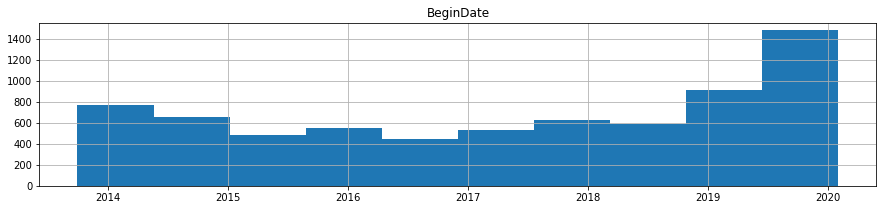

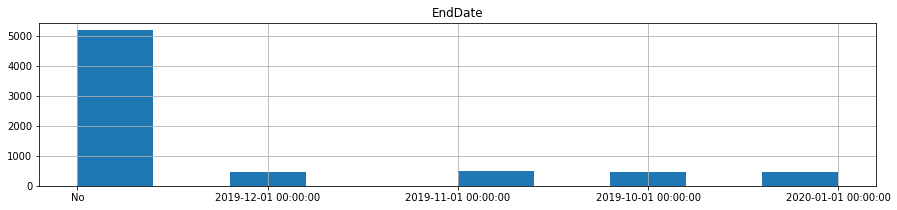

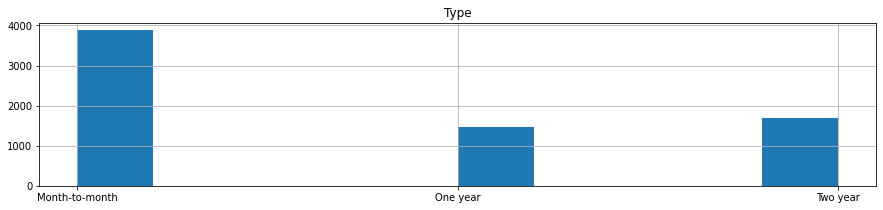

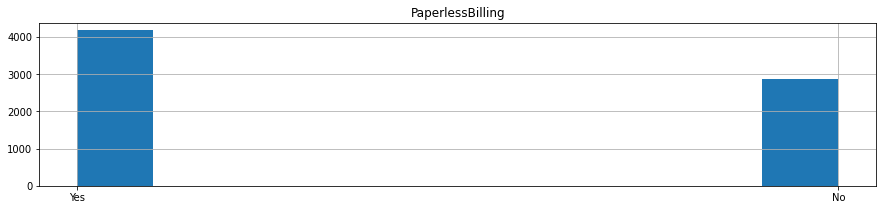

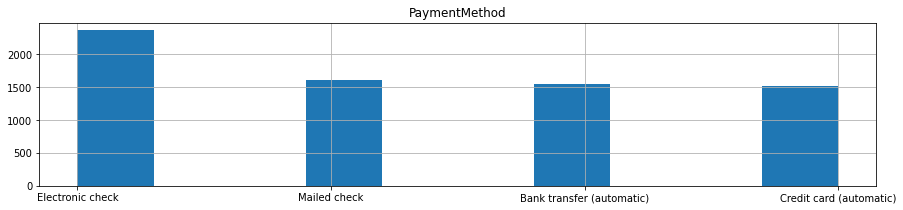

In [21]:
# посмотрим на распределение по столбцам в таблице с договорами
contract_columns = ['BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod']
for col in contract_columns:
    plt.figure(figsize=(15, 3))
    contract[col].hist()
    plt.title(col)
    plt.show()

In [22]:
personal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

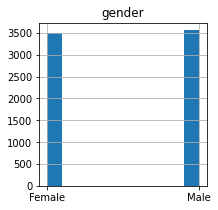

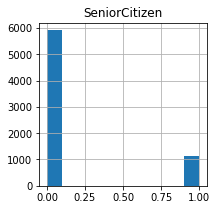

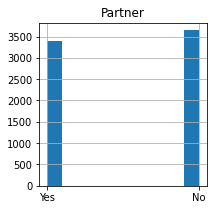

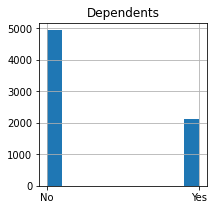

In [23]:
# посмотрим на распределение по столбцам в таблице с данными о клиентах
personal_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in personal_columns:
    plt.figure(figsize=(3, 3))
    personal[col].hist()
    plt.title(col)
    plt.show()

In [24]:
internet.columns

Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

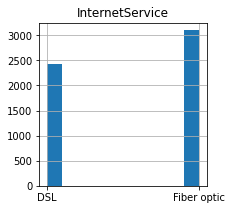

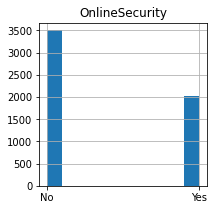

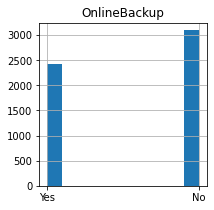

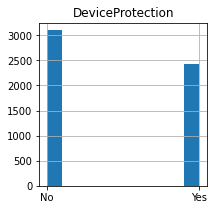

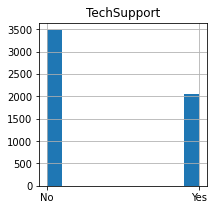

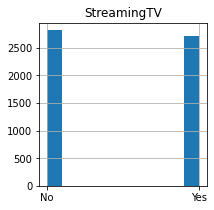

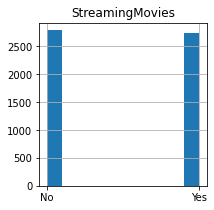

In [25]:
# посмотрим на распределение по столбцам в таблице с интернет-услугами
internet_columns = ['InternetService', 'OnlineSecurity',\
                    'OnlineBackup', 'DeviceProtection',\
                    'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_columns:
    plt.figure(figsize=(3, 3))
    internet[col].hist()
    plt.title(col)
    plt.show()

Text(0.5, 1.0, 'MultipleLines')

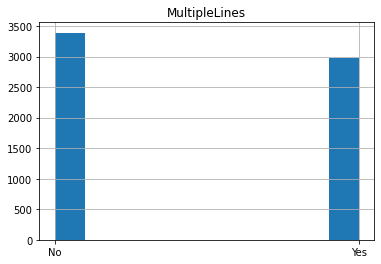

In [26]:
# посмотрим на распределение столбца MultipleLines в таблице с услугами телефонии
phone['MultipleLines'].hist()
plt.title('MultipleLines')

## Вывод

Количество заключенных договоров за последние два года (2019 и 2020) существенно увеличилось. Большинство клиентов из выборки являются действующими. Однако, последние 4 месяца наблюдается равномерный отток клиентов примерно по 500 человек в месяц. Большинство клиентов платят помесячно и используют для оплаты безналичный расчет. В качестве методы оплаты большинство клиентов выбирают электронный чек.

Из таблицы с персональными данными клиентов можно сделать вывод, что нет какого-то явного преобладания между клиентами мужского или женского пола. Что касается данных о пенсионерах, то их лишь приблизительно 1/7 часть их всей выборки. Чуть меньше половины клиентов имеют супруга(у). Около 30% клиентов имеют иждивенцев.

В разрезе интернет-услуг, предоставляемых компанией, можно заключить, что большинство клиентов выбирает тип подкючения через оптоволоконный кабель. Из дополнительных услуг не пользуются популярностью услуги по обеспечению интернет-безопасности, такие как блокировка небеопасных сайтов и антивирус, услуги по предоставлению облачного хранилища данных для резервнго копирования, а также услуги по выделенной линии технической поддержки. А вот стриминговые сервисы, такие как потоковое тв и каталог фильмов предпочитает подключать почти половина клиентов.

Что касается телефонии, возможность подключаться к нескольким линиям одновременно выбирают около 47% клиентов из выборки.

# Предобработка

## Приведение к типам данных и создание признаков

In [27]:
# создадим столбец с целевым признаком - оттоком клиентов
# если в столбце EndDate стоит дата, значит клиент ушел и целевой признак равен 1
# если в столбце EndDate стоит 'No', значит клиент не ушел и целевой признак равен 0

def func(row):
    EndDate = row['EndDate']
    if EndDate != 'No':
        return 1
    return 0

contract['Churn'] = contract.apply(func, axis=1)
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [28]:
# в столбце EndDate заменим значения 'No' на дату выгрузки данных из базы
# приведем столбец EndDate к формату даты
contract['EndDate'] = contract['EndDate'].replace(['No'], ['2020-02-01'])
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d')
contract['EndDate'].head()

0   2020-02-01
1   2020-02-01
2   2019-12-01
3   2020-02-01
4   2019-11-01
Name: EndDate, dtype: datetime64[ns]

In [29]:
# создадим столбец с "продолжительностью жизни" клиента в компании
contract['Duration'] = (contract['EndDate'] - contract['BeginDate']).dt.days
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Duration
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61


In [30]:
# при попытке привести столбец TotalCharges к типу float 
# вышла ошибка, что есть строки с пробелами,
# посмотрим на них подробнее
contract[contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Duration
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,0,0


У всех клиентов дата заключения договора равна дате выгрузки из базы. Скорее всего, на тот момент эти клиенты еще не оплачивали счета. Заменим пробелы на 0.

In [31]:
contract['TotalCharges'] = contract['TotalCharges'].replace([' '], 0)
contract['TotalCharges'] = contract['TotalCharges'].astype('float64')

In [32]:
# проверим, что замена произошла корректно
contract[contract['BeginDate'] == '2020-02-01'][['BeginDate', 'TotalCharges']]

,BeginDate,TotalCharges
488,2020-02-01,0.0
753,2020-02-01,0.0
936,2020-02-01,0.0
1082,2020-02-01,0.0
1340,2020-02-01,0.0
3331,2020-02-01,0.0
3826,2020-02-01,0.0
4380,2020-02-01,0.0
5218,2020-02-01,0.0
6670,2020-02-01,0.0


## Объединение таблиц

In [33]:
telecom = contract \
    .merge(personal, how='outer', on='customerID') \
    .merge(internet, how='outer', on='customerID') \
    .merge(phone, how='outer', on='customerID')

telecom.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Duration,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [34]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churn             7043 non-null   int64         
 9   Duration          7043 non-null   int64         
 10  gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   int64         
 12  Partner           7043 non-null   object        
 13  Dependents        7043 non-null   object        
 14  InternetService   5517 n

In [35]:
telecom.describe()

,MonthlyCharges,TotalCharges,Churn,Duration,SeniorCitizen
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.265370,985.996166,0.162147
std,30.090047,2266.794470,0.441561,747.587844,0.368612
min,18.250000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,398.550000,0.000000,273.000000,0.000000
50%,70.350000,1394.550000,0.000000,883.000000,0.000000
75%,89.850000,3786.600000,1.000000,1676.000000,0.000000
max,118.750000,8684.800000,1.000000,2191.000000,1.000000


Средние месячные траты составляют около 65, средние суммарные траты составляют приблизительно 2280. Средняя продолжительность действия контракта 986 дней.

После объединения таблиц образовались пропуски, т.к. клиенты не пользовались услугами. Необходимо заменить пропуски на 'No'.

In [36]:
telecom = telecom.fillna('No')
telecom.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Duration            0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

<AxesSubplot:>

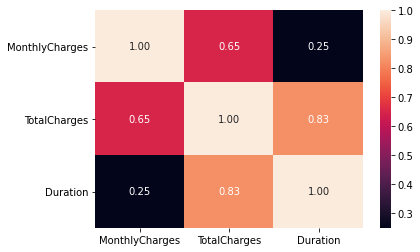

In [37]:
sns.heatmap(telecom[['MonthlyCharges', 'TotalCharges', 'Duration']].corr(), annot=True, fmt=".2f")

Из матрицы корреляции можно заметить, что коэффициент корреляции между продолжительностью контракта и суммарными тратами суммарными тратами 0.83, что говорит о сильной положительной корреляции. Чем дольше действует контракт, тем больше суммарные траты. Т.к. качесто модели может ухудшиться, столбец TotalCharges необходимо удалить. Также можно удалить столбцы с датами, потому что всю необходимую информацию мы вычленили из них в отдельные столбцы. Столбец с идентификационными номерами клиентов также не является значимым для обучения модели.

In [38]:
telecom = telecom.drop(['customerID', 'BeginDate', 'EndDate', 'TotalCharges'], axis=1)
telecom.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Duration,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,Month-to-month,Yes,Electronic check,29.85,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,One year,No,Mailed check,56.95,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,Month-to-month,Yes,Mailed check,53.85,1,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,One year,No,Bank transfer (automatic),42.30,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,Month-to-month,Yes,Electronic check,70.70,1,61,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


## Подготовка признаков

In [39]:
# закодируем категориальные признаки техникой OHE
telecom = pd.get_dummies(telecom, drop_first=True)
telecom.head()

,MonthlyCharges,Churn,Duration,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,29.85,0,31,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,56.95,0,1036,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,53.85,1,61,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,0,1371,0,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4,70.70,1,61,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [40]:
# разобьем на обучающую и тестовую выборки
target = telecom['Churn']
features = telecom.drop('Churn', axis=1)

features_train, features_test, target_train, target_test = (
train_test_split(features, target, test_size=0.25, random_state=80822))
features_train.shape, target_train.shape, features_test.shape, target_test.shape

((5282, 21), (5282,), (1761, 21), (1761,))

In [41]:
# т.к. одной из моделей планирую использовать логистическую регрессию
# необходимо масштабировать численные признаки
# выделим численные признаки и масштабируем их

numeric = ['MonthlyCharges', 'Duration']
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


print(features_train.shape)
features_train.head()

(5282, 21)


,MonthlyCharges,Duration,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
3248,0.730826,-0.913071,1,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,1
6898,1.175559,-0.421383,0,1,0,1,0,0,1,1,...,1,1,0,0,1,1,0,1,1,0
2450,1.520725,1.615039,0,0,1,1,0,0,0,0,...,1,1,0,1,0,1,1,1,1,1
5153,0.993019,0.351654,1,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,1,0
5176,-0.624945,-0.259273,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0


<AxesSubplot:>

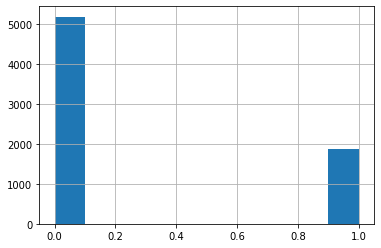

In [42]:
target.hist()

Наблюдаем дисбаланс классов. Ключевой метрикой в данном проекте служит AUC-ROC. Эта метрика устойчива к дисбалансу классов, поэтому от применения методов борьбы с дисбаланом существенно не изменяется. Всвязи с этим нет необходимости бороться с дисбалансом.

## Вывод

В ходе этого этапа была произведена подготовка данных для дальнейшего обучения. Данные в столбцах были приведены к корректным типам, были созданы новые столбцы. Все таблицы были объеденены в одну, заполнены пропуски после обединения. Были исследованы зависимости между признаками и удалены ненужные признаки. Было произведено кодирование категориальных и масштабирование численных признаков. Данные были разделены на обучающую и тестовую выборки.

# Обучение модели

In [43]:
# напишем функцию для построения ROC-кривой
def roc_curve_plot(targ, prob):
    fpr, tpr, thresholds = roc_curve(targ, prob)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели (выглядит как прямая)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-кривая")
    plt.show()

In [44]:
# автоматизируем процесс получения информации о качесвте модели
# предсказания будем делать на трейне
# в качестве основной метрики будет AUC-ROC, в качесвте дополнительной - Accuracy
def automation(model):
    model.fit(features_train, target_train)
    pred = model.predict(features_train)
    prob = model.predict_proba(features_train)
    prob_one = prob[:, 1]
    acc = accuracy_score(target_train, pred)
    auc_roc = roc_auc_score(target_train, prob_one)
    print('Accuracy модели', model, 'на обучающей выборке:', round(acc, 4))
    print('AUC-ROC:', round(auc_roc, 4))
    roc_curve_plot(target_train, prob_one)

## Логистическая регрессия

In [45]:
%%time

# подберем наилучшие гиперпараметры модели с помощью поиска по сетке
parametrs = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty': ['l1', 'l2']}

model_lr = LogisticRegression(solver='liblinear', n_jobs=-1, random_state=80822)

grid_lr = GridSearchCV(model_lr, parametrs, cv=5, scoring='roc_auc')
grid_lr.fit(features_train, target_train)

grid_lr.best_params_

CPU times: user 4.39 s, sys: 6.62 s, total: 11 s
Wall time: 11 s


{'C': 10, 'penalty': 'l2'}

In [46]:
# инициализируем модель с наилучшими гиперпараметрами
model_lr = LogisticRegression(random_state=80822, solver='liblinear', n_jobs=-1, C=10, penalty='l2')

Accuracy модели LogisticRegression(C=10, n_jobs=-1, random_state=80822, solver='liblinear') на обучающей выборке: 0.8095
AUC-ROC: 0.8455


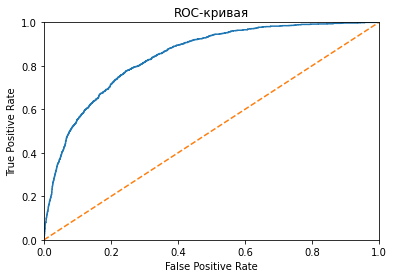

In [47]:
# получим информацию о качестве модели
automation(model_lr)

## Случайный лес

In [48]:
%%time

parametrs = {'n_estimators': range(1, 100, 5), 
            'max_depth': range(1, 12)}

model_rf = RandomForestClassifier(random_state=80822)

grid_rf = GridSearchCV(model_rf, parametrs, cv=5, scoring='roc_auc')
grid_rf.fit(features_train, target_train)

grid_rf.best_params_

CPU times: user 2min 32s, sys: 1.16 s, total: 2min 33s
Wall time: 2min 35s


{'max_depth': 8, 'n_estimators': 81}

In [49]:
model_rf = RandomForestClassifier(random_state=80822, max_depth=8, n_estimators=81)

Accuracy модели RandomForestClassifier(max_depth=8, n_estimators=81, random_state=80822) на обучающей выборке: 0.8438
AUC-ROC: 0.9117


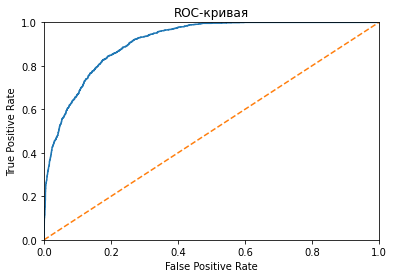

In [50]:
automation(model_rf)

## CatBoost

In [51]:
%%time

model_cat = CatBoostClassifier(random_state=80822)

parametrs = {'iterations': [50],
             'depth': range(1, 10),
             'learning_rate': [0.01, 0.05, 0.1, 1]}

grid_cat = model_cat.grid_search(parametrs, features_train, target_train, cv=5,
                                 verbose=50, plot=False)

grid_cat['params']

0:	learn: 0.6894593	test: 0.6893236	best: 0.6893236 (0)	total: 60.5ms	remaining: 2.97s
1:	learn: 0.6858292	test: 0.6853538	best: 0.6853538 (1)	total: 61.7ms	remaining: 1.48s
2:	learn: 0.6822806	test: 0.6816758	best: 0.6816758 (2)	total: 62.6ms	remaining: 981ms
3:	learn: 0.6789973	test: 0.6782690	best: 0.6782690 (3)	total: 63.5ms	remaining: 730ms
4:	learn: 0.6757502	test: 0.6746471	best: 0.6746471 (4)	total: 64.3ms	remaining: 578ms
5:	learn: 0.6723348	test: 0.6709236	best: 0.6709236 (5)	total: 65ms	remaining: 477ms
6:	learn: 0.6680593	test: 0.6664356	best: 0.6664356 (6)	total: 65.7ms	remaining: 404ms
7:	learn: 0.6647478	test: 0.6628225	best: 0.6628225 (7)	total: 66.4ms	remaining: 349ms
8:	learn: 0.6615121	test: 0.6592885	best: 0.6592885 (8)	total: 67ms	remaining: 305ms
9:	learn: 0.6583825	test: 0.6560472	best: 0.6560472 (9)	total: 67.7ms	remaining: 271ms
10:	learn: 0.6554433	test: 0.6527852	best: 0.6527852 (10)	total: 68.3ms	remaining: 242ms
11:	learn: 0.6524119	test: 0.6494700	best: 0.

{'depth': 5, 'learning_rate': 1, 'iterations': 50}

In [52]:
model_cat = CatBoostClassifier(random_state=80822, depth=5, learning_rate=1, iterations=50, verbose=0)

Accuracy модели <catboost.core.CatBoostClassifier object at 0x7f1b97f521f0> на обучающей выборке: 0.9256
AUC-ROC: 0.9707


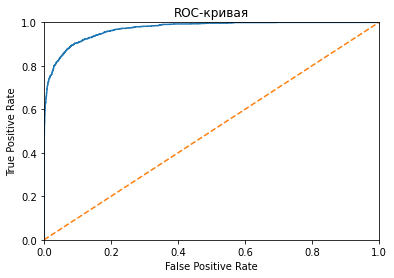

In [53]:
automation(model_cat)

## Сравнение моделей

In [54]:
index = ['Логистическая регрессия', 'Случайный лес', 'CatBoost']
columns = ['Accuracy', 'AUC-ROC']
values = [[0.8095, 0.8455],
          [0.8438, 0.9117],
          [0.9256, 0.9707]]
final = pd.DataFrame(index = index, columns=columns, data=values)
final.sort_values(by='AUC-ROC', ascending=False)

,Accuracy,AUC-ROC
CatBoost,0.9256,0.9707
Случайный лес,0.8438,0.9117
Логистическая регрессия,0.8095,0.8455


Наилучшее значение метрики показала модель CatBoost. 

## Тестирование лучшей модели

Accuracy модели CatBoost на тестовой выборке: 0.8620102214650767
AUC-ROC модели CatBoost на тестовой выборке: 0.9053450294273296


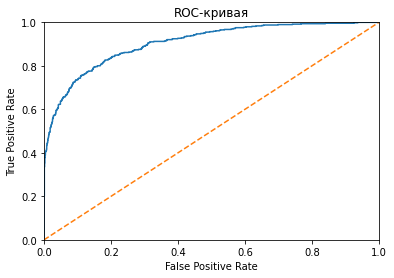

In [55]:
model_cat.fit(features_train, target_train)
predictions_cat = model_cat.predict(features_test)
probabilities_cat = model_cat.predict_proba(features_test)
probabilities_one_cat = probabilities_cat[:, 1]
acc_cat = accuracy_score(target_test, predictions_cat)
auc_roc_cat = roc_auc_score(target_test, probabilities_one_cat)
print('Accuracy модели CatBoost на тестовой выборке:', acc_cat)
print('AUC-ROC модели CatBoost на тестовой выборке:', auc_roc_cat)
roc_curve_plot(target_test, probabilities_one_cat)

## Важность признаков

In [56]:
feature_importances_df = pd.DataFrame(data=model_cat.feature_importances_, 
                                   index=features_test.columns, 
                                   columns=['importance'])

feature_importances_df.sort_values(by='importance', ascending=False)

,importance
Duration,60.851040
MonthlyCharges,10.223294
Type_Two year,4.958413
InternetService_Fiber optic,3.918030
Type_One year,2.348794
InternetService_No,2.078779
SeniorCitizen,1.956946
MultipleLines_Yes,1.809745
StreamingMovies_Yes,1.618743
gender_Male,1.411656


<AxesSubplot:>

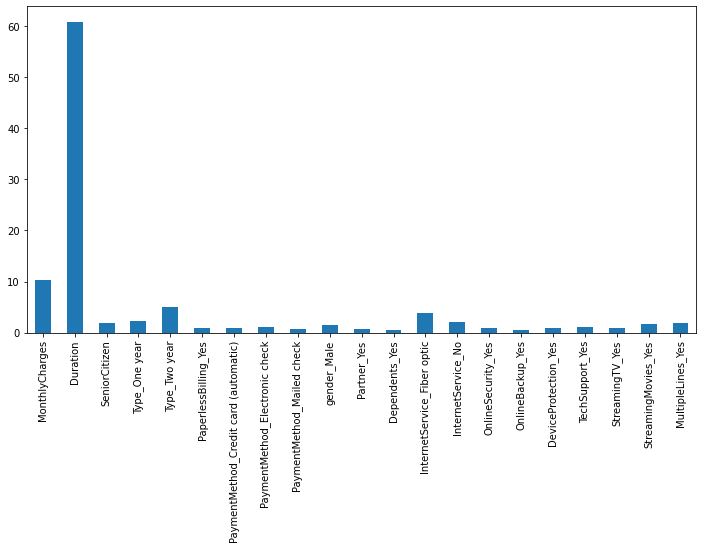

In [57]:
feature_importances_df['importance'].plot(kind='bar', figsize=(12, 6))

Среди факторов, наиболее важных для обучения модели, сильно выделяется фактор продолжительности действия контракта. Также можно отметить такой фактор как месячные траты.

# Заключение

Наилучший результат показала модель CatBoost. Метрика AUC-ROC на тестовом наборе данных составляет 0.905, метрика Accuracy - 0.862. 

Что касается практической пользы применения модели, то она позволит периодически выявлять клиентов, которые потенциально могут уйти из компании. Получив такую информацию, компания сможет оперативно предпринимать меры по предотвращению ухода клиентов.

Среди факторов, наиболее важных для обучения модели, сильно выделяется фактор продолжительности действия контракта. Также можно отметить такой фактор как месячные траты.